In [6]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
from scipy.stats import chi2_contingency

In [41]:
end = dt.datetime(2023,10,1)
start = dt.datetime(2000,1,1)
start, end

(datetime.datetime(2000, 1, 1, 0, 0), datetime.datetime(2023, 10, 1, 0, 0))

In [27]:
sp500url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500url)
data_table[0].head()


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [83]:
tickers = data_table[0]['Symbol'].tolist()
snp_prices = yf.download(tickers, start='2000-01-01', end='2022-01-05')['Adj Close']

[*********************100%%**********************]  503 of 503 completed



6 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-01 -> 2022-01-05)')
['VLTO', 'CEG', 'GEHC', 'KVUE']: Exception("%ticker%: Data doesn't exist for startDate = 1577854800, endDate = 1641358800")
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
count,507.000000,507.000000,507.000000,507.000000,269.000000,507.000000,507.000000,507.000000,507.000000,507.000000,...,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,116.582684,17.806644,116.564388,90.778574,166.507435,103.711663,36.116686,251.530284,488.429468,134.474729,...,99.053692,61.279964,45.390682,51.636774,95.252120,101.563745,136.089834,392.977239,42.251752,163.880296
std,30.101670,5.024390,29.594371,14.334145,19.918948,15.738799,5.868560,60.147179,101.463430,26.685981,...,22.346622,3.646281,10.023930,8.588757,22.110763,16.917596,17.672164,137.796216,11.834946,30.690406
min,61.769447,9.040000,54.848969,54.681705,124.800003,58.973110,22.240000,136.182098,285.000000,77.097466,...,42.809273,45.243546,26.121841,30.578379,54.303379,53.006927,76.085960,161.509995,21.381781,90.484154
25%,87.959312,13.060000,90.325291,78.466206,149.440002,89.496799,31.175000,205.152534,432.715012,110.519772,...,81.871986,59.019272,36.622236,43.437334,77.313873,88.446018,125.539932,258.404999,29.841285,139.706131
50%,116.557495,17.990000,122.161865,92.776154,168.070007,105.217476,36.820000,243.113663,481.920013,139.079178,...,94.385391,61.664276,48.844982,52.713699,95.894142,100.150917,139.516464,383.750000,44.017200,158.068329
75%,146.342201,21.389999,139.830101,101.723274,179.940002,115.796658,40.400000,296.677811,568.319977,158.048561,...,120.974506,63.966562,54.578972,58.321404,115.871304,114.803780,150.294060,511.165009,51.987724,190.316483
max,176.669449,30.469999,180.190979,125.752525,216.839996,136.396820,48.180000,403.419525,688.369995,181.988815,...,150.204025,68.480179,61.881470,66.997948,134.655579,134.357651,170.146301,614.549988,63.423664,243.595840


[*********************100%%**********************]  503 of 503 completed


6 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2000-01-01 -> 2022-01-05)')
['VLTO', 'CEG', 'GEHC', 'KVUE']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1641358800")
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


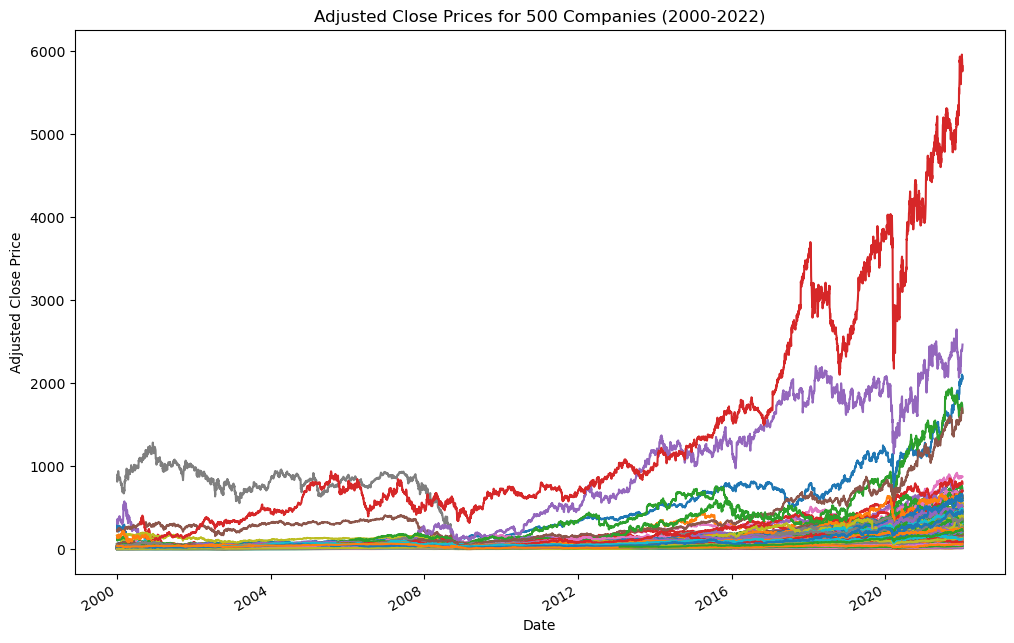

In [103]:
import matplotlib.pyplot as plt

tickers = data_table[0]['Symbol'].tolist()

snp_prices = yf.download(tickers, start='2000-01-01', end='2022-01-05')['Adj Close']

# Plot the adjusted close prices for each ticker
snp_prices.plot(figsize=(12, 8), legend=False)
plt.title('Adjusted Close Prices for 500 Companies (2000-2022)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()


In [70]:
import requests
import json
from tqdm import tqdm
from ratelimit import limits, sleep_and_retry

api_key = '837a05cca328ffa0890170f4daddb4f267ce37c2aa6f6a13e000'

@sleep_and_retry
@limits(calls=10, period=60)
def call_api(symbol):
    response = requests.get(f"https://api.datajockey.io/v0/company/financials?apikey={api_key}&ticker={symbol}&period=Q&filetype=json")

    if response.status_code != 200:
        raise Exception('API response: {} and {}'.format(response.status_code, response.json()))
    return response.json()


def build_fundamentals_data(df):
  results = []
  exception_statements = []
  for symbol in tqdm(df):
      try: 
          result = call_api(symbol)
          results.append(result)
      except Exception as e:
          exception_statements.append(f"Failed for symbol {symbol} with message: {str(e)}")

  for statement in exception_statements:
      print(statement)

  with open('fundamentals_results.json', 'w') as output_file:
        json.dump(results, output_file)


In [71]:
build_fundamentals_data(tickers)

python(16527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
100%|██████████| 503/503 [50:01<00:00,  5.97s/it]  


Failed for symbol GOOG with message: API response: 404 and {'error': 'The data for this ticker does not exist'}
Failed for symbol BRK.B with message: API response: 404 and {'error': 'The data for this ticker does not exist'}
Failed for symbol BF.B with message: API response: 404 and {'error': 'The data for this ticker does not exist'}
Failed for symbol COR with message: API response: 404 and {'error': 'The data for this ticker does not exist'}
Failed for symbol CEG with message: API response: 404 and {'error': 'The data for this ticker does not exist'}
Failed for symbol EG with message: API response: 404 and {'error': 'The data for this ticker does not exist'}
Failed for symbol FI with message: API response: 404 and {'error': 'The data for this ticker does not exist'}
Failed for symbol FOX with message: API response: 404 and {'error': 'The data for this ticker does not exist'}
Failed for symbol NWS with message: API response: 404 and {'error': 'The data for this ticker does not exist'}

In [72]:
import json

with open('fundamentals_results.json') as f:
    financial_records = json.load(f)

In [76]:
from tqdm import tqdm

record_set = set(financial_records[0]["financial_data"]["quarterly"].keys())
df = pd.DataFrame(columns=["ticker", "currency", "quarter", *record_set])


for record in tqdm(financial_records):
    start_quarter, end_quarter = None, None

    for variable in record_set:
        record_keys = list(record["financial_data"]["quarterly"][variable].keys())

        if len(record_keys) != 0:
            smallest_quarter_in_record = min(record_keys)
            biggest_quarter_in_record = max(record_keys)
            start_quarter = min(start_quarter, smallest_quarter_in_record) if start_quarter is not None else smallest_quarter_in_record
            end_quarter = max(end_quarter, biggest_quarter_in_record) if end_quarter is not None else biggest_quarter_in_record

    quarter_list = [start_quarter]
    start_quarter = [int(entry) for entry in start_quarter.split("Q")]
    running_quarter = start_quarter
    pres_quarter = None
    while pres_quarter != end_quarter:
        running_quarter[0] = running_quarter[0] + (running_quarter[1])//4
        running_quarter[1] = running_quarter[1]%4 + 1
        pres_quarter = f"{running_quarter[0]}Q{running_quarter[1]}"
        quarter_list.append(pres_quarter)

    for quarter in quarter_list:
        df.loc[len(df.index)] = [record['company_info']['ticker'], record['currency'], quarter, *[record["financial_data"]["quarterly"][variable].get(quarter, None) for variable in record_set]]

df

100%|██████████| 492/492 [13:38<00:00,  1.66s/it]


,ticker,currency,quarter,pre_tax_income,property_plant_and_equipment_net,stock_based_compensation,shareholder_equity,operating_cash_flow,investing_cash_flow,other_assets_noncurrent,...,net_income,total_liabilities,income_tax,long_term_debt,depreciation_amortization,operating_income,total_current_liabilities,current_net_receivables,eps_diluted,cost_of_revenue
0,MMM,USD,2006Q4,None,None,None,10238000000,None,None,None,...,None,None,None,None,None,None,None,None,NaN,None
1,MMM,USD,2007Q1,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,NaN,None
2,MMM,USD,2007Q2,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,NaN,None
3,MMM,USD,2007Q3,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,NaN,None
4,MMM,USD,2007Q4,None,None,None,12072000000,None,None,None,...,None,None,None,None,None,None,None,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30379,ZTS,USD,2022Q2,670000000,2559000000,None,4580000000,None,None,147000000,...,529000000,9190000000,141000000,5221000000,117000000,670000000,3051000000,1291000000,1.12,625000000
30380,ZTS,USD,2022Q3,667000000,2623000000,None,4663000000,None,None,161000000,...,529000000,9012000000,139000000,5210000000,115000000,667000000,2880000000,1189000000,1.13,607000000
30381,ZTS,USD,2022Q4,592000000,2753000000,None,4405000000,None,None,147000000,...,461000000,10522000000,332000000,6552000000,119000000,592000000,3167000000,1215000000,0.98,653000000
30382,ZTS,USD,2023Q1,697000000,2913000000,9000000,4494000000,549000000,-216000000,143000000,...,552000000,9263000000,20000000,6559000000,120000000,697000000,1915000000,1186000000,1.19,588000000


In [99]:
df.info()
subset = df[['ticker', 'quarter', 'revenue', 'net_income', 'total_assets', 'total_liabilities']]
print(subset.head())
print(subset.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30384 entries, 0 to 30383
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   ticker                                  30384 non-null  object
 1   currency                                30384 non-null  object
 2   quarter                                 30384 non-null  object
 3   pre_tax_income                          23773 non-null  object
 4   property_plant_and_equipment_net        23074 non-null  object
 5   stock_based_compensation                8134 non-null   object
 6   shareholder_equity                      27101 non-null  object
 7   operating_cash_flow                     7557 non-null   object
 8   investing_cash_flow                     7544 non-null   object
 9   other_assets_noncurrent                 24175 non-null  object
 10  selling_general_administrative_expense  16598 non-null  object
 11  sh

In [91]:
dismissal_with_tickers = pd.read_csv('merged.csv') 
dismissal_updated = dismissal_with_tickers[["year","ceo_dismissal","The fiscal year during which the CEO exited - for clarity","leftofc","Symbol","Sector"]]
dismissal_updated.head()
dismissal_updated.info() 
dismissal_updated.describe()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   year                                                       598 non-null    int64 
 1   ceo_dismissal                                              598 non-null    int64 
 2   The fiscal year during which the CEO exited - for clarity  598 non-null    int64 
 3   leftofc                                                    598 non-null    object
 4   Symbol                                                     598 non-null    object
 5   Sector                                                     598 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


,year,ceo_dismissal,The fiscal year during which the CEO exited - for clarity
count,598.000000,598.000000,598.000000
mean,2005.963211,0.195652,2006.571906
std,7.638744,0.397034,7.665582
min,1992.000000,0.000000,1992.000000
25%,1999.000000,0.000000,2000.000000
50%,2006.000000,0.000000,2006.000000
75%,2013.000000,0.000000,2013.000000
max,2019.000000,1.000000,2021.000000


In [98]:
dismissal_updated['leftofc'] = pd.to_datetime(dismissal_updated['leftofc'])
dismissal_updated.loc[:, 'dismissal_year'] = dismissal_updated['leftofc'].dt.year
total_dismissals_by_sector = dismissal_updated.groupby('Sector')['ceo_dismissal'].sum().reset_index()
print(total_dismissals_by_sector)


                        Sector  ceo_dismissal
0       Consumer Discretionary             25
1             Consumer Staples             18
2                       Energy              4
3                   Financials             15
4                  Health Care             13
5                  Industrials             13
6       Information Technology             12
7                    Materials              4
8                  Real Estate              3
9   Telecommunication Services              0
10                   Utilities             10


/var/folders/ws/y4s13dw95dd92p32p0mgjt600000gn/T/ipykernel_12413/3117195630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dismissal_updated['leftofc'] = pd.to_datetime(dismissal_updated['leftofc'])
/var/folders/ws/y4s13dw95dd92p32p0mgjt600000gn/T/ipykernel_12413/3117195630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dismissal_updated.loc[:, 'dismissal_year'] = dismissal_updated['leftofc'].dt.year


In [101]:
dismissal_updated['leftofc'] = pd.to_datetime(dismissal_updated['leftofc'])
dismissal_updated['dismissal_year'] = dismissal_updated['leftofc'].dt.year

contingency_table = pd.crosstab(dismissal_updated['Sector'], dismissal_updated['ceo_dismissal'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi-square Test Result:")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print("\nThe dismissal is statistically significant across different sectors.")
else:
    print("\nThe dismissal is not statistically significant across different sectors.")


Contingency Table:
ceo_dismissal                0   1
Sector                            
Consumer Discretionary      71  25
Consumer Staples            53  18
Energy                      28   4
Financials                  60  15
Health Care                 59  13
Industrials                 75  13
Information Technology      37  12
Materials                   37   4
Real Estate                  9   3
Telecommunication Services   1   0
Utilities                   51  10

Chi-square Test Result:
Chi2: 10.602450208096847
P-value: 0.38931719942737253

The dismissal is not statistically significant across different sectors.


/var/folders/ws/y4s13dw95dd92p32p0mgjt600000gn/T/ipykernel_12413/3613367208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dismissal_updated['leftofc'] = pd.to_datetime(dismissal_updated['leftofc'])
/var/folders/ws/y4s13dw95dd92p32p0mgjt600000gn/T/ipykernel_12413/3613367208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dismissal_updated['dismissal_year'] = dismissal_updated['leftofc'].dt.year


In [104]:
dismissal_updated['leftofc'] = pd.to_datetime(dismissal_updated['leftofc'])
dismissal_updated['dismissal_year'] = dismissal_updated['leftofc'].dt.year
dismissal_updated['is_special_year'] = dismissal_updated['dismissal_year'].isin([2000, 2001, 2007, 2008, 2009])

contingency_table = pd.crosstab(dismissal_updated['is_special_year'], dismissal_updated['ceo_dismissal'])

chi2, p, _, _ = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi-square Test Result:")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print("\nThe dismissal is statistically significant in the specified years.")
else:
    print("\nThe dismissal is not statistically significant in the specified years.")


/var/folders/ws/y4s13dw95dd92p32p0mgjt600000gn/T/ipykernel_12413/3355454497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dismissal_updated['leftofc'] = pd.to_datetime(dismissal_updated['leftofc'])
/var/folders/ws/y4s13dw95dd92p32p0mgjt600000gn/T/ipykernel_12413/3355454497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dismissal_updated['dismissal_year'] = dismissal_updated['leftofc'].dt.year
/var/folders/ws/y4s13dw95dd92p32p0mgjt600000gn/T/ipykernel_12413/3355454497.py:3: SettingWithCopyWarning:

Contingency Table:
ceo_dismissal      0   1
is_special_year         
False            380  91
True             101  26

Chi-square Test Result:
Chi2: 0.027019345942060357
P-value: 0.8694354513602165

The dismissal is not statistically significant in the specified years.


/var/folders/ws/y4s13dw95dd92p32p0mgjt600000gn/T/ipykernel_12413/2947541742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dismissal_updated['Dismissal Year'] = pd.to_datetime(dismissal_updated['leftofc']).dt.year


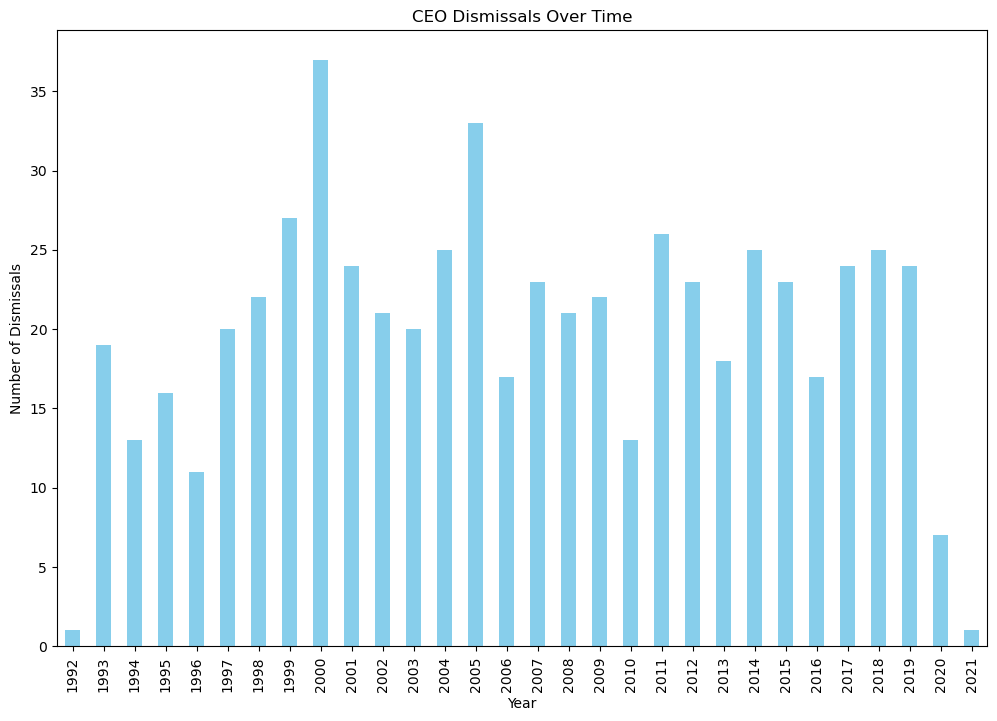

In [105]:
dismissal_updated['Dismissal Year'] = pd.to_datetime(dismissal_updated['leftofc']).dt.year

# Plot time trends for CEO dismissals
time_trends = dismissal_updated['Dismissal Year'].value_counts().sort_index()
plt.figure(figsize=(12, 8))
time_trends.plot(kind='bar', color='skyblue')
plt.title('CEO Dismissals Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Dismissals')
plt.show()
